# Comparison between variant annotation databases

Created: **31/07/18**  
Last modified: **07/08/18**

**Goal:** ...  
This notebook is divided in ? parts:

* **1. Bla**: Bla

**Refs:**
* `annotating.ipynb` [Pierre]
* `custom_tools.R` [Pierre](./annotating.ipynb)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CIViC" data-toc-modified-id="CIViC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CIViC</a></span><ul class="toc-item"><li><span><a href="#Join-database-with-impact" data-toc-modified-id="Join-database-with-impact-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Join database with impact</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Cancer-Genome-Interpreter" data-toc-modified-id="Cancer-Genome-Interpreter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cancer Genome Interpreter</a></span><ul class="toc-item"><li><span><a href="#Join-database-with-impact" data-toc-modified-id="Join-database-with-impact-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Join database with impact</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Precision-Medicine-Knowledgebase" data-toc-modified-id="Precision-Medicine-Knowledgebase-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Precision Medicine Knowledgebase</a></span></li><li><span><a href="#https://ckb.jax.org/about/index" data-toc-modified-id="https://ckb.jax.org/about/index-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><a href="https://ckb.jax.org/about/index" target="_blank">https://ckb.jax.org/about/index</a></a></span></li><li><span><a href="#Others" data-toc-modified-id="Others-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Others</a></span></li></ul></div>

***

In [1]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [2]:
impact <- get_cleaned_impact("../../../data")
impact <- add_features("../../../data", impact, oncokb = TRUE)

We will study different databases available online and compare them with OncoKB:
* [CIViC](https://civicdb.org/)
* [Cancer Genome Interpreter](https://www.cancergenomeinterpreter.org/home)
* [MyCancerGenome](https://www.mycancergenome.org)

## CIViC

Downloaded from https://civicdb.org/releases under "Variant Summaries", 01/07/18 version

### Join database with impact

In [3]:
civic <- read.table("../../../data/other_databases/CIViC_01-Jul-2018-VariantSummaries.tsv",
                    sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [4]:
nrow(civic)
length(unique(civic$gene))

[1] 1885

[1] 353

In [5]:
colnames(civic)

[1] "variant_id"                 "variant_civic_url"         
 [3] "gene"                       "entrez_id"                 
 [5] "variant"                    "summary"                   
 [7] "variant_groups"             "chromosome"                
 [9] "start"                      "stop"                      
[11] "reference_bases"            "variant_bases"             
[13] "representative_transcript"  "ensembl_version"           
[15] "reference_build"            "chromosome2"               
[17] "start2"                     "stop2"                     
[19] "representative_transcript2" "variant_types"             
[21] "hgvs_expressions"           "last_review_date"          
[23] "civic_actionability_score"

In [6]:
interesting_columns <- c(
"gene",
"variant",
"chromosome",
"start",
"stop",
"reference_bases",
"variant_bases",
"representative_transcript",
"ensembl_version",
"reference_build",
"variant_types",
"hgvs_expressions",
"civic_actionability_score")

head(civic[, interesting_columns], 10)

gene,variant,chromosome,start,stop,reference_bases,variant_bases,representative_transcript,ensembl_version,reference_build,variant_types,hgvs_expressions,civic_actionability_score
ABL1,BCR-ABL,22,23522397,23632600,,,ENST00000305877.8,75,GRCh37,transcript_fusion,,238.0
ABL1,BCR-ABL T334I,9,133748283,133748283,C,T,ENST00000372348.2,75,GRCh37,"transcript_fusion,missense_variant","NM_007313.2:c.1001C>T,NP_005148.2:p.Thr315Ile,ENST00000372348.2:c.1001C>T,NC_000009.11:g.133748283C>T",54.0
ABL1,BCR-ABL E255K,9,133738363,133738363,G,A,ENST00000318560.5,75,GRCh37,"transcript_fusion,missense_variant","NC_000009.11:g.133738363G>A,NM_005157.5:c.763G>A,NP_005148.2:p.Glu255Lys,ENST00000318560.5:c.763G>A",17.0
AKT1,E17K,14,105246551,105246551,C,T,ENST00000407796.2,75,GRCh37,missense_variant,"NC_000014.8:g.105246551C>T,NM_001014432.1:c.49G>A,NP_001014432.1:p.Glu17Lys,ENST00000407796.2:c.49G>A",32.5
ALK,EML4-ALK,2,42396490,42522656,,,ENST00000318522.5,75,GRCh37,transcript_fusion,,48.0
ALK,EML4-ALK C1156Y,2,29445258,29445258,C,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3467G>A,NC_000002.11:g.29445258C>T,NM_004304.4:c.3467G>A,NP_004295.2:p.Cys1156Tyr",19.0
ALK,EML4-ALK L1196M,2,29443631,29443631,G,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3586C>A,NC_000002.11:g.29443631G>T,NM_004304.4:c.3586C>A,NP_004295.2:p.Leu1196Met",31.0
ALK,F1174L,2,29443695,29443695,G,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3522C>A,NP_004295.2:p.Phe1174Leu,NC_000002.11:g.29443695G>T,ENST00000389048.3:c.3522C>A",33.5
ALK,R1275Q,2,29432664,29432664,C,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3824G>A,NP_004295.2:p.Arg1275Gln,NC_000002.11:g.29432664C>T,ENST00000389048.3:c.3824G>A",23.0
ARAF,S214C,X,47426121,47426121,C,G,ENST00000377045.4,75,GRCh37,missense_variant,"NC_000023.10:g.47426121C>G,NM_001654.4:c.641C>G,NP_001645.1:p.Ser214Cys,ENST00000377045.4:c.641C>G",11.0


We will join the database using `join_key = chromosome`\_`start`_`reference_bases`_`variant_bases`, even though a lot of keys will be invalid no better alternative was found.

In [7]:
# creating the key
civic$join_key <- paste(civic$chromosome, civic$start, civic$reference_bases, civic$variant_bases, sep = "_")
civic$join_key[civic$chromosome == "" |
               civic$start == "" |
               (civic$reference_bases == "" & civic$variant_bases   == "")] <- "no_key"

In [8]:
nrow(civic[civic$join_key == "no_key",])
nrow(civic)

# delete the rows where we couldn't compute a key
civic <- civic[civic$join_key != "no_key",]

[1] 1082

[1] 1885

In [9]:
# check the unicity of `join_key`
length(unique(civic$join_key))
nrow(civic)

repeated_key <- civic %>% group_by(join_key) %>% filter(n() > 1)
repeated_key[order(repeated_key$join_key), interesting_columns]

[1] 797

[1] 803

gene,variant,chromosome,start,stop,reference_bases,variant_bases,representative_transcript,ensembl_version,reference_build,variant_types,hgvs_expressions,civic_actionability_score
FLT3,TKD MUTATION,13,28592642,28592642,C,A,ENST00000241453.7,75,GRCh37,nonsynonymous_variant,NC_000013.10:g.28592642C>A,120.0
FLT3,D835,13,28592642,28592642,C,A,ENST00000241453.7,75,GRCh37,protein_altering_variant,NC_000013.10:g.28592642C>A,46.0
ERBB2,P780INS,17,37881011,37881012,,GGCTCCCCA,ENST00000269571.5,75,GRCh37,inframe_insertion,"ENST00000269571.5:c.2340_2341insGGCTCCCCA,NC_000017.10:g.37881011_37881012insGGCTCCCCA",12.5
ERBB2,G778_P780DUP,17,37881011,37881012,,GGCTCCCCA,ENST00000269571.5,75,GRCh37,inframe_insertion,NM_004448.3:c.2332_2340dupGGCTCCCCA,15.0
ALK,EML4-ALK G1269A,2,29432682,29432682,C,G,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3806G>C,NC_000002.11:g.29432682C>G,NM_004304.4:c.3806G>C,NP_004295.2:p.Gly1269Ala",17.5
ALK,ALK FUSION G1269A,2,29432682,29432682,C,G,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3806G>C,NC_000002.11:g.29432682C>G,NM_004304.4:c.3806G>C,NP_004295.2:p.Gly1269Ala",10.0
ALK,F1245C,2,29436859,29436859,A,C,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3734T>G,NP_004295.2:p.Phe1245Cys,NC_000002.11:g.29436859A>C,ENST00000389048.3:c.3734T>G",10.5
ALK,ALK FUSION F1245C,2,29436859,29436859,A,C,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","NM_004304.4:c.3734T>G,NP_004295.2:p.Phe1245Cys,NC_000002.11:g.29436859A>C,ENST00000389048.3:c.3734T>G",14.5
VHL,P59fs (c.173_174insC),3,10183704,10183705,,C,ENST00000256474.2,75,GRCh37,frameshift_truncation,"ENST00000256474.2:c.173_174insC,NP_000542.1:p.Pro59AlafsTer73,NM_000551.3:c.173_174insC,NC_000003.11:g.10183704_10183705insC",7.5
VHL,R58fs (c.173_174insC),3,10183704,10183705,,C,ENST00000256474.2,75,GRCh37,frameshift_variant,ENST00000256474.2:c.173_174insC,0.0


In [10]:
# delete the repeated keys
civic <- civic[! civic$join_key %in% repeated_key$join_key,]
nrow(civic)

[1] 791

In [11]:
impact$is_in_civic <- "no"
impact$is_in_civic[impact$mut_key %in% civic$join_key] <- "yes"

### Results


    no    yes 
235490  12860 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                524                 380               47373               16230 
Predicted Oncogenic             Unknown 
               2874              180969 

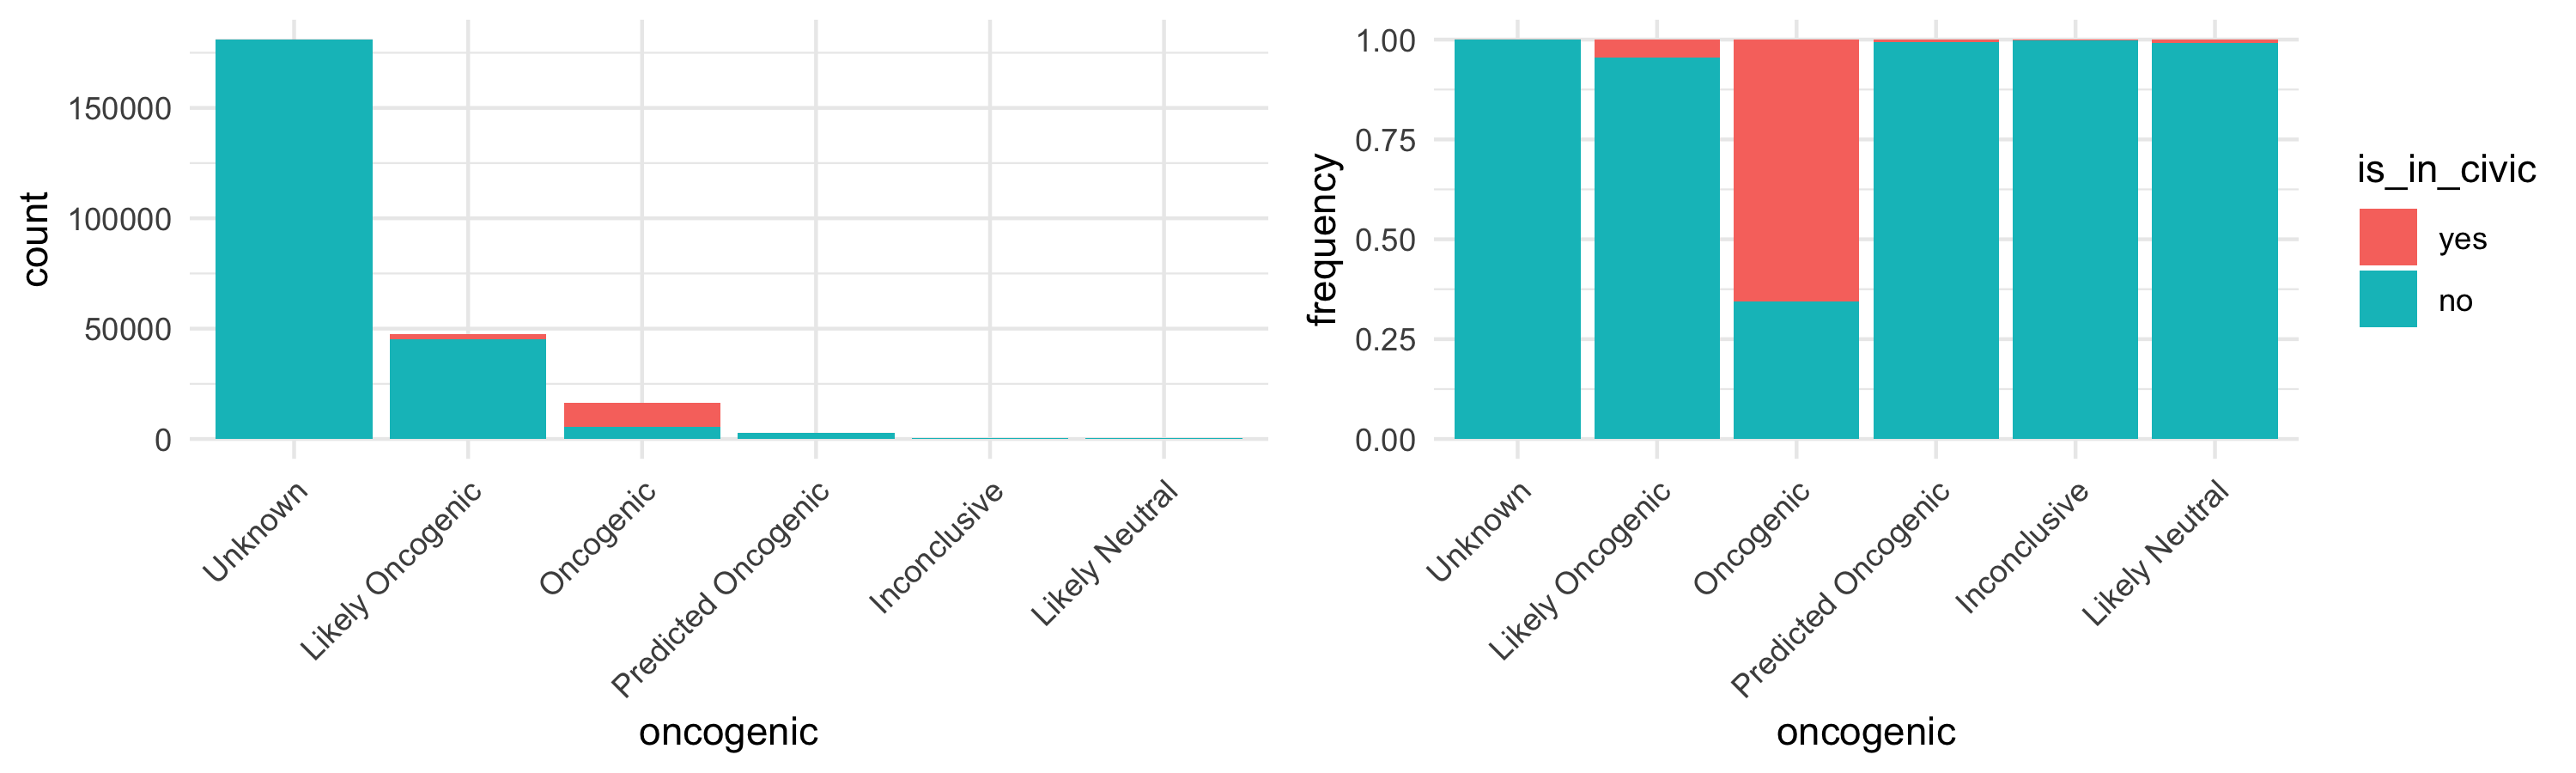

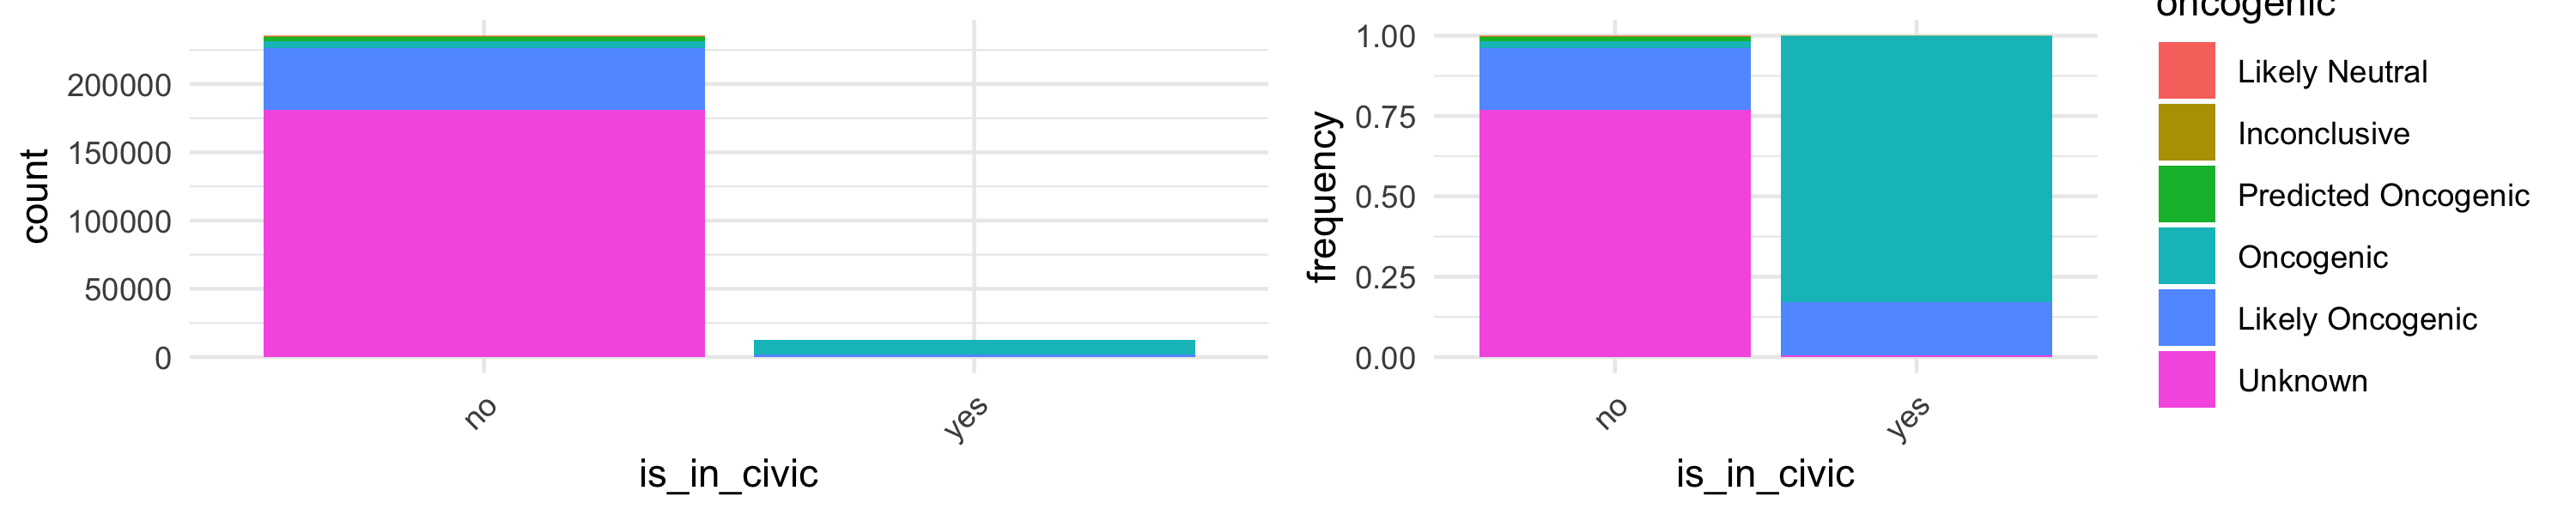

In [12]:
table(impact$is_in_civic)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_civic", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_civic", "oncogenic", 10, 2)

## Cancer Genome Interpreter

**Data:** downloaded from https://www.cancergenomeinterpreter.org/mutations, 01/17/18 version

### Join database with impact

In [13]:
cgi <- read.table("../../../data/other_databases/CGI_catalog_of_validated_oncogenic_mutations.tsv",
                  sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [14]:
nrow(cgi)
length(unique(cgi$gene))

[1] 5601

[1] 247

In [15]:
colnames(cgi)

[1] "gene"           "gdna"           "protein"        "transcript"    
[5] "info"           "context"        "cancer_acronym" "source"        
[9] "reference"

In [16]:
head(cgi, 10)

gene,gdna,protein,transcript,info,context,cancer_acronym,source,reference
ABCB4,chr7:g.87053221C>T,.,ENST00000265723,CSQN=SpliceDonorSNV;C2=SpliceDonorOfExon17_At_chr7:87053221;aliases=ENSP00000265723;source=Ensembl,germline,HC-PR,ClinVar,Clinvar:NM_018849.2(ABCB4):c.2211+1G>A AND Progressive familial intrahepatic cholestasis 3
ABL1,chr9:g.133738306G>A,p.E236K,ENST00000318560,CSQN=Missense;codon_pos=133738306-133738307-133738308;ref_codon_seq=GAG;aliases=ENSP00000323315;source=Ensembl,somatic,CML,DoCM,PMID:21562040
ABL1,chr9:g.133738309A>G,p.M237V,ENST00000318560,"CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738309_133738311delATGinsGTA,chr9:g.133738309_133738311delATGinsGTC,chr9:g.133738309_133738311delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738325T>C,p.I242T,ENST00000318560,"CSQN=Missense;reference_codon=ATC;candidate_codons=ACA,ACG,ACT,ACC;candidate_mnv_variants=chr9:g.133738325_133738326delTCinsCA,chr9:g.133738325_133738326delTCinsCG,chr9:g.133738325_133738326delTCinsCT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738330A>G,p.M244V,ENST00000318560,"CSQN=Missense;codon_pos=133738330-133738331-133738332;ref_codon_seq=ATG;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738330_133738332delATGinsGTA,chr9:g.133738330_133738332delATGinsGTC,chr9:g.133738330_133738332delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:20367437__PMID:21895409__PMID:25157968__PMID:12399961__PMID:12576318__PMID:23676790__PMID:18223278__PMID:12623848__PMID:21888027
ABL1,chr9:g.133738340A>G,p.K247R,ENST00000318560,"CSQN=Missense;reference_codon=AAG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_mnv_variants=chr9:g.133738340_133738341delAGinsGA,chr9:g.133738339_133738340delAAinsCG,chr9:g.133738339_133738341delAAGinsCGA,chr9:g.133738339_133738341delAAGinsCGC,chr9:g.133738339_133738341delAAGinsCGT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738342C>G,p.L248V,ENST00000318560,"CSQN=Missense;codon_pos=133738342-133738343-133738344;ref_codon_seq=CTG;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;reference_codon=CTG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738342_133738344delCTGinsGTA,chr9:g.133738342_133738344delCTGinsGTC,chr9:g.133738342_133738344delCTGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:18354488__PMID:20367437__PMID:25157968__PMID:21221851__PMID:17008892__PMID:12623848
ABL1,chr9:g.133738348G>A,p.G250R,ENST00000318560,"CSQN=Missense;reference_codon=GGG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_snv_variants=chr9:g.133738348G>C;candidate_mnv_variants=chr9:g.133738348_133738350delGGGinsAGA,chr9:g.133738348_133738350delGGGinsCGA,chr9:g.133738348_133738350delGGGinsCGC,chr9:g.133738348_133738350delGGGinsCGT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738349G>A,p.G250E,ENST00000318560,"CSQN=Missense;reference_codon=GGG;candidate_codons=GAG,GAA;candidate_mnv_variants=chr9:g.133738349_133738350delGGinsAA;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;codon_pos=133738348-133738349-133738350;ref_codon_seq=GGG;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:21505103__PMID:20367437__PMID:21895409__PMID:22870928__PMID:25157968__PMID:11964322__PMID:23676790__PMID:12623848
ABL1,chr9:g.133738355A>G,p.Q252R,ENST00000318560,"CSQN=Missense;reference_codon=CAG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_mnv_variants=chr9:g.133738354_133738355delCAinsAG,chr9:g.133738355_133738356delAGinsGA,chr9:g.133738355_133738356delAGinsGC,chr9:g.133738355_133738356delAGinsGT,chr9:g.133738354_133738356delCAGinsAGA;aliases=ENSP

We will join the database using `protein` as the key:

In [17]:
# check the unicity of our key
length(unique(cgi$protein))
nrow(cgi)

repeated_key <- cgi %>% group_by(protein) %>% filter(n() > 1)
head(repeated_key[order(repeated_key$protein),], 5)

[1] 5069

[1] 5601

gene,gdna,protein,transcript,info,context,cancer_acronym,source,reference
ABCB4,chr7:g.87053221C>T,.,ENST00000265723,CSQN=SpliceDonorSNV;C2=SpliceDonorOfExon17_At_chr7:87053221;aliases=ENSP00000265723;source=Ensembl,germline,HC-PR,ClinVar,Clinvar:NM_018849.2(ABCB4):c.2211+1G>A AND Progressive familial intrahepatic cholestasis 3
APC,chr5:g.112102884A>G,.,ENST00000257430,CSQN=SpliceAcceptorSNV;C2=SpliceAcceptorOfExon4_At_chr5:112102885;aliases=ENSP00000257430;source=Ensembl,germline,CANCER-PR,ClinVar,Clinvar:NM_000038.5(APC):c.221-2A>G AND Hereditary cancer-predisposing syndrome
APC,chr5:g.112111325G>C,.,ENST00000257430,CSQN=SpliceAcceptorSNV;C2=SpliceAcceptorOfExon5_At_chr5:112111325;aliases=ENSP00000257430;source=Ensembl,germline,CANCER-PR,ClinVar,Clinvar:NM_000038.5(APC):c.423-1G>C AND Hereditary cancer-predisposing syndrome
ATM,chr11:g.108098352A>C,.,ENST00000278616,CSQN=CdsStartSNV;C2=cds_start_at_chr11:108098352;aliases=ENSP00000278616;source=Ensembl,germline,CANCER-PR,ClinVar,Clinvar:NM_000051.3(ATM):c.1A>C (p.Met1Leu) AND Hereditary cancer-predisposing syndrome
ATM,chr11:g.108098352A>G,.,ENST00000278616,CSQN=CdsStartSNV;C2=cds_start_at_chr11:108098352;aliases=ENSP00000278616;source=Ensembl,germline,CANCER-PR,ClinVar,Clinvar:NM_000051.3(ATM):c.1A>G (p.Met1Val) AND Hereditary cancer-predisposing syndrome


In [18]:
# delete the repeated keys
cgi <- cgi[! cgi$protein %in% repeated_key$protein,]
nrow(cgi)

[1] 4828

In [19]:
impact$is_in_cgi <- "no"
impact$is_in_cgi[impact$HGVSp_Short %in% cgi$protein] <- "yes"

### Results


    no    yes 
230612  17738 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                524                 380               47373               16230 
Predicted Oncogenic             Unknown 
               2874              180969 

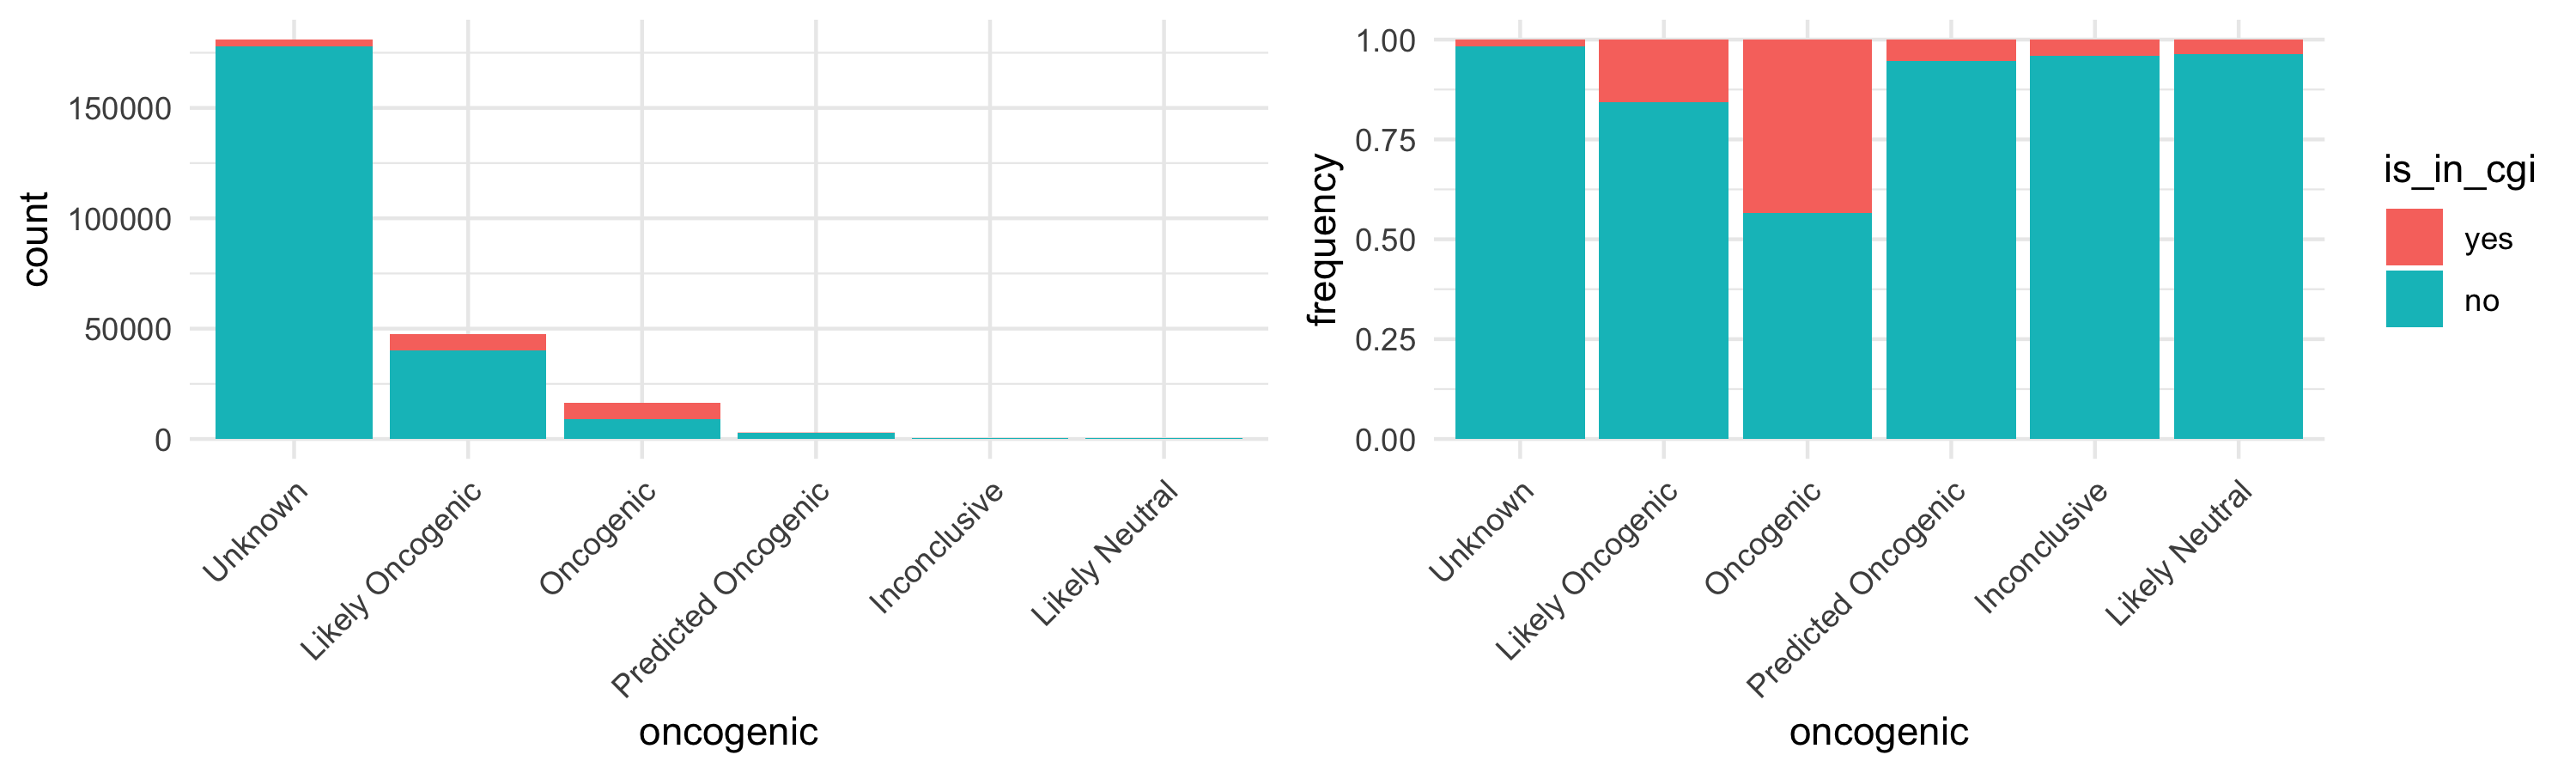

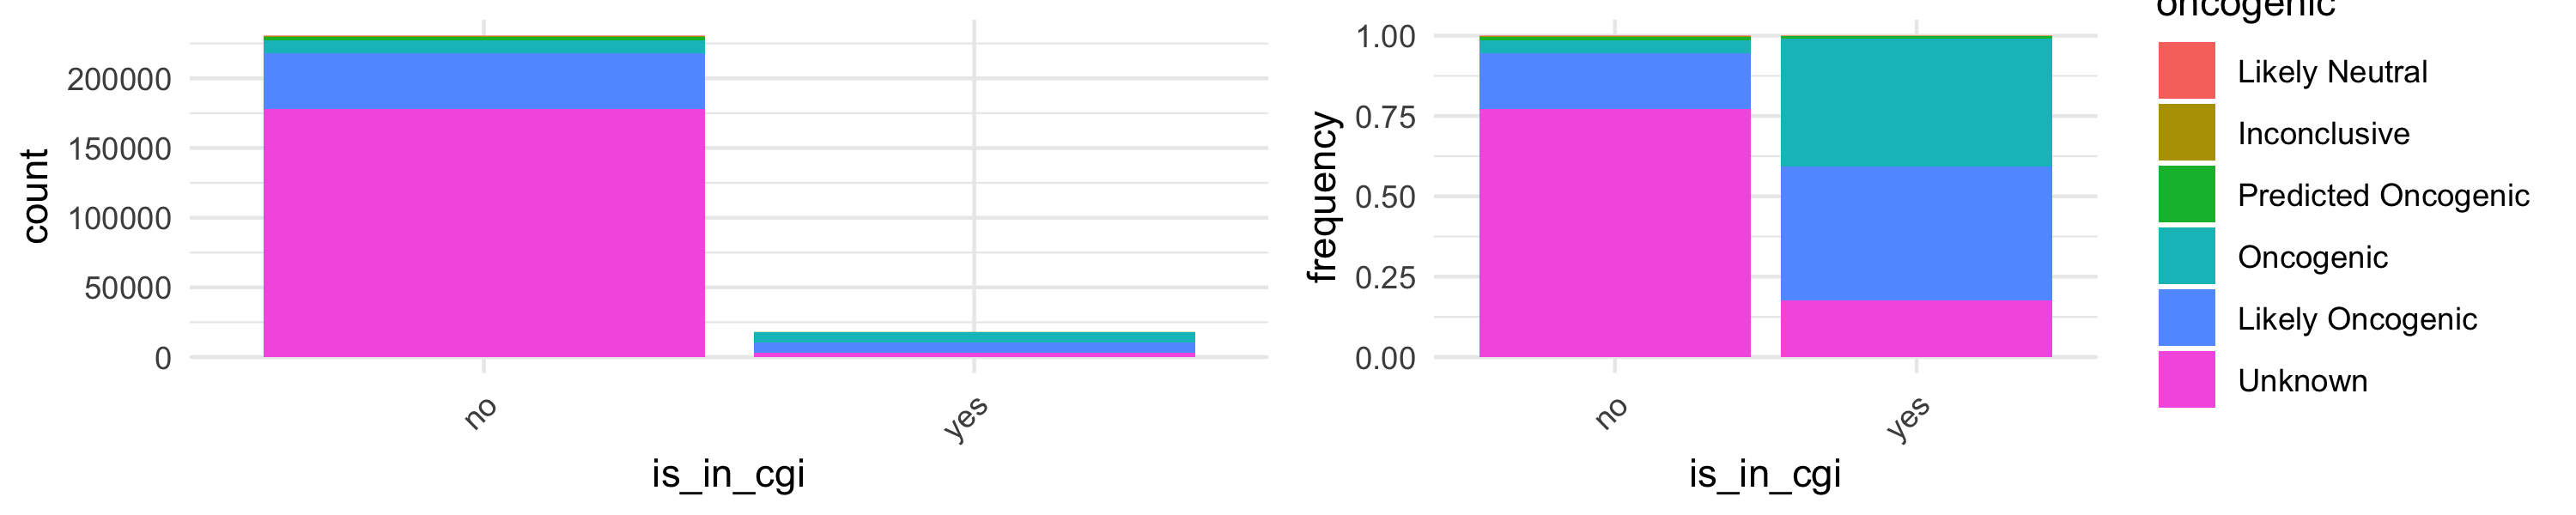

In [20]:
table(impact$is_in_cgi)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic", "is_in_cgi", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_cgi", "oncogenic", 10, 2)

## Precision Medicine Knowledgebase

**Data:** downloaded from https://pmkb.weill.cornell.edu under "Welcome to Precision Medicine Knowledgebase", 02/08/18 version

In [21]:
names <- read.table("../../../data/other_databases/IPM_Knowledgebase_Interpretations_Complete_20180802-1538.csv", nrow = 1,
                   sep = ",", stringsAsFactors = FALSE, fill = TRUE, quote = "")
names

Warning message in file(file, "rt"):
“cannot open file '../../../data/other_databases/IPM_Knowledgebase_Interpretations_Complete_20180802-1538.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
pmkb <- read.table("../../../data/other_databases/IPM_Knowledgebase_Interpretations_Complete_20180802-1538.csv", skip = 1,
                   sep = ",", stringsAsFactors = FALSE, fill = TRUE, quote = "")[,1:6]
colnames(pmkb) <- names[,1:6]

In [ ]:
head(pmkb, 10)

In [ ]:
nrow(pmkb)
length(unique(pmkb$Gene))

## https://ckb.jax.org/about/index

## Others

In [ ]:
candl <- read.table("../../../data/other_databases/candl.csv",
                    sep = ",", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [ ]:
nrow(candl)
head(candl)
length(unique(candl$Gene))

In [ ]:
# creating the key
candl$join_key <- paste(civic$Chromosome, civic$DNA.Position, civic$Normal.AA, civic$Mutation.AA, sep = "_")
head(candl$join_ke)
candl$join_key[civic$chromosome == "" |
               civic$start == "" |
               (civic$reference_bases == "" & civic$variant_bases   == "")] <- "no_key"

In [ ]:
nrow(civic[civic$join_key == "no_key",])
nrow(civic)

# delete the rows where we couldn't compute a key
civic <- civic[civic$join_key != "no_key",]

In [ ]:
# check the unicity of `join_key`
length(unique(civic$join_key))
nrow(civic)

repeated_key <- civic %>% group_by(join_key) %>% filter(n() > 1)
repeated_key[order(repeated_key$join_key), interesting_columns]

In [ ]:
# delete the repeated keys
civic <- civic[! civic$join_key %in% repeated_key$join_key,]
nrow(civic)

In [ ]:
impact$is_in_civic <- "no"
impact$is_in_civic[impact$mut_key %in% civic$join_key] <- "yes"